<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2023-2/blob/main/ML_day9/9_1_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://github.com/SLCFLAB/Data-Science-Python

https://github.com/Harry24k/Pytorch-Basic

# GAN

* 🧔🏻 G: 위조지폐 제작
* 👮🏻‍♀️ D: 위조지폐 판별 - G 실패
* 🧔🏻 G: 다시 위조지폐 제작
* 👮🏻‍♀️ D: 판별 실패 - G 성공

In [1]:
import torch
import torch.nn as nn
import torch.nn.init
import torch.optim as optim

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

In [3]:
batch_size = 100

train_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=True)

In [4]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

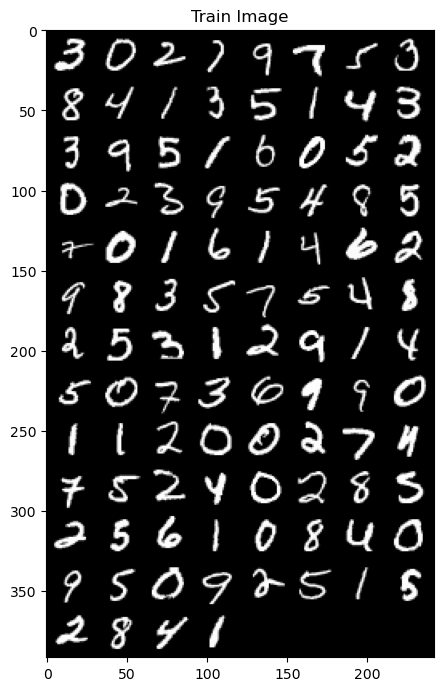

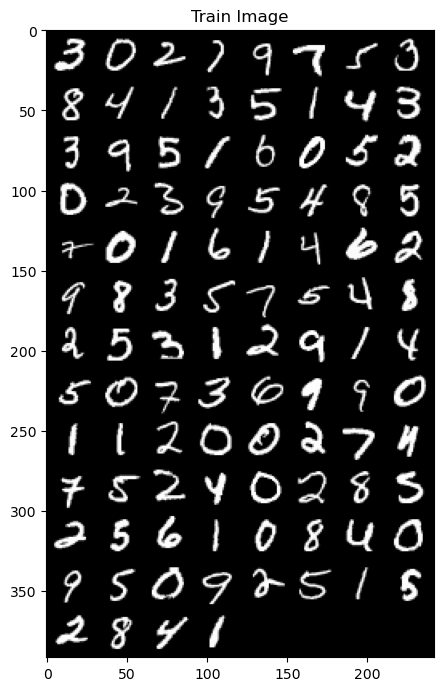

In [5]:
#images, labels = iter(train_loader).next()
images, labels = next(iter(train_loader))
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

## Discriminator

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(28*28, 500),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(500, 250),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(250, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        out = self.discriminator(x)
        return out

## Generator

In [7]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(100, 250),
            nn.ReLU(),
            nn.Linear(250, 500),
            nn.ReLU(),
            nn.Linear(500, 28*28),
            nn.Sigmoid()
        )
        
    def forward(self, z):
        out = self.generator(z)
        out = out.view(-1, 1, 28, 28)
        return out

In [8]:
D = Discriminator().cuda()
G = Generator().cuda()

## Train

In [9]:
def gan_loss(x, target_is_real):
    
    loss = nn.BCELoss()
    
    if target_is_real : 
        target_tensor = torch.ones(batch_size, 1)
        
    else :
        target_tensor = torch.zeros(batch_size, 1)
        
    return loss(x, target_tensor.cuda())

In [10]:
G_optimizer = optim.Adam(G.parameters(), lr=0.0001)
D_optimizer = optim.Adam(D.parameters(), lr=0.0001)

In [11]:
num_epochs = 50

In [12]:
for epoch in range(num_epochs):
        
    total_batch = len(mnist_train) // batch_size
    
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.cuda()
            
        # Discriminator
        prob_real = D(images)
        D_loss_real = gan_loss(prob_real, True)

        z = torch.randn((batch_size, 100)).cuda()
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        D_loss_fake = gan_loss(prob_fake, False)
        
        D_loss = D_loss_real + D_loss_fake
        
        D.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        
        # Generator
        z = torch.randn((batch_size, 100)).cuda()
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        G_loss = gan_loss(prob_fake, True)
        
        G.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], D_Loss: %.4f, G_Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, D_loss.item(), G_loss.item()))

Epoch [1/50], lter [100/600], D_Loss: 0.4227, G_Loss: 2.6634
Epoch [1/50], lter [100/600], D_Loss: 0.4227, G_Loss: 2.6634
Epoch [1/50], lter [200/600], D_Loss: 0.1561, G_Loss: 3.3053
Epoch [1/50], lter [200/600], D_Loss: 0.1561, G_Loss: 3.3053
Epoch [1/50], lter [300/600], D_Loss: 0.0891, G_Loss: 4.5257
Epoch [1/50], lter [300/600], D_Loss: 0.0891, G_Loss: 4.5257
Epoch [1/50], lter [400/600], D_Loss: 0.0451, G_Loss: 4.8753
Epoch [1/50], lter [400/600], D_Loss: 0.0451, G_Loss: 4.8753
Epoch [1/50], lter [500/600], D_Loss: 0.0326, G_Loss: 5.5487
Epoch [1/50], lter [500/600], D_Loss: 0.0326, G_Loss: 5.5487
Epoch [1/50], lter [600/600], D_Loss: 0.0820, G_Loss: 6.3035
Epoch [1/50], lter [600/600], D_Loss: 0.0820, G_Loss: 6.3035
Epoch [2/50], lter [100/600], D_Loss: 0.0838, G_Loss: 8.6365
Epoch [2/50], lter [100/600], D_Loss: 0.0838, G_Loss: 8.6365
Epoch [2/50], lter [200/600], D_Loss: 0.0319, G_Loss: 7.9173
Epoch [2/50], lter [200/600], D_Loss: 0.0319, G_Loss: 7.9173
Epoch [2/50], lter [300/

Epoch [12/50], lter [200/600], D_Loss: 0.0134, G_Loss: 7.0063
Epoch [12/50], lter [200/600], D_Loss: 0.0134, G_Loss: 7.0063
Epoch [12/50], lter [300/600], D_Loss: 0.0038, G_Loss: 7.2179
Epoch [12/50], lter [300/600], D_Loss: 0.0038, G_Loss: 7.2179
Epoch [12/50], lter [400/600], D_Loss: 0.0032, G_Loss: 7.0923
Epoch [12/50], lter [400/600], D_Loss: 0.0032, G_Loss: 7.0923
Epoch [12/50], lter [500/600], D_Loss: 0.0075, G_Loss: 7.1786
Epoch [12/50], lter [500/600], D_Loss: 0.0075, G_Loss: 7.1786
Epoch [12/50], lter [600/600], D_Loss: 0.0038, G_Loss: 7.1595
Epoch [12/50], lter [600/600], D_Loss: 0.0038, G_Loss: 7.1595
Epoch [13/50], lter [100/600], D_Loss: 0.0063, G_Loss: 6.2416
Epoch [13/50], lter [100/600], D_Loss: 0.0063, G_Loss: 6.2416
Epoch [13/50], lter [200/600], D_Loss: 0.0501, G_Loss: 6.6794
Epoch [13/50], lter [200/600], D_Loss: 0.0501, G_Loss: 6.6794
Epoch [13/50], lter [300/600], D_Loss: 0.0035, G_Loss: 7.2109
Epoch [13/50], lter [300/600], D_Loss: 0.0035, G_Loss: 7.2109
Epoch [1

Epoch [23/50], lter [200/600], D_Loss: 0.0430, G_Loss: 6.7167
Epoch [23/50], lter [300/600], D_Loss: 0.0186, G_Loss: 6.3219
Epoch [23/50], lter [300/600], D_Loss: 0.0186, G_Loss: 6.3219
Epoch [23/50], lter [400/600], D_Loss: 0.0242, G_Loss: 5.8265
Epoch [23/50], lter [400/600], D_Loss: 0.0242, G_Loss: 5.8265
Epoch [23/50], lter [500/600], D_Loss: 0.0416, G_Loss: 6.0732
Epoch [23/50], lter [500/600], D_Loss: 0.0416, G_Loss: 6.0732
Epoch [23/50], lter [600/600], D_Loss: 0.0580, G_Loss: 6.5704
Epoch [23/50], lter [600/600], D_Loss: 0.0580, G_Loss: 6.5704
Epoch [24/50], lter [100/600], D_Loss: 0.0841, G_Loss: 6.3389
Epoch [24/50], lter [100/600], D_Loss: 0.0841, G_Loss: 6.3389
Epoch [24/50], lter [200/600], D_Loss: 0.0896, G_Loss: 6.8396
Epoch [24/50], lter [200/600], D_Loss: 0.0896, G_Loss: 6.8396
Epoch [24/50], lter [300/600], D_Loss: 0.0237, G_Loss: 6.5259
Epoch [24/50], lter [300/600], D_Loss: 0.0237, G_Loss: 6.5259
Epoch [24/50], lter [400/600], D_Loss: 0.0252, G_Loss: 6.3640
Epoch [2

Epoch [34/50], lter [300/600], D_Loss: 0.2560, G_Loss: 3.4577
Epoch [34/50], lter [300/600], D_Loss: 0.2560, G_Loss: 3.4577
Epoch [34/50], lter [400/600], D_Loss: 0.2765, G_Loss: 3.9118
Epoch [34/50], lter [400/600], D_Loss: 0.2765, G_Loss: 3.9118
Epoch [34/50], lter [500/600], D_Loss: 0.1341, G_Loss: 3.4517
Epoch [34/50], lter [500/600], D_Loss: 0.1341, G_Loss: 3.4517
Epoch [34/50], lter [600/600], D_Loss: 0.2409, G_Loss: 3.6093
Epoch [34/50], lter [600/600], D_Loss: 0.2409, G_Loss: 3.6093
Epoch [35/50], lter [100/600], D_Loss: 0.2467, G_Loss: 3.0305
Epoch [35/50], lter [100/600], D_Loss: 0.2467, G_Loss: 3.0305
Epoch [35/50], lter [200/600], D_Loss: 0.1857, G_Loss: 3.0625
Epoch [35/50], lter [200/600], D_Loss: 0.1857, G_Loss: 3.0625
Epoch [35/50], lter [300/600], D_Loss: 0.3686, G_Loss: 3.3111
Epoch [35/50], lter [300/600], D_Loss: 0.3686, G_Loss: 3.3111
Epoch [35/50], lter [400/600], D_Loss: 0.2862, G_Loss: 3.4194
Epoch [35/50], lter [400/600], D_Loss: 0.2862, G_Loss: 3.4194
Epoch [3

Epoch [45/50], lter [300/600], D_Loss: 0.4819, G_Loss: 2.5334
Epoch [45/50], lter [400/600], D_Loss: 0.3192, G_Loss: 2.5286
Epoch [45/50], lter [400/600], D_Loss: 0.3192, G_Loss: 2.5286
Epoch [45/50], lter [500/600], D_Loss: 0.3404, G_Loss: 2.4899
Epoch [45/50], lter [500/600], D_Loss: 0.3404, G_Loss: 2.4899
Epoch [45/50], lter [600/600], D_Loss: 0.3007, G_Loss: 2.6489
Epoch [45/50], lter [600/600], D_Loss: 0.3007, G_Loss: 2.6489
Epoch [46/50], lter [100/600], D_Loss: 0.5769, G_Loss: 2.6301
Epoch [46/50], lter [100/600], D_Loss: 0.5769, G_Loss: 2.6301
Epoch [46/50], lter [200/600], D_Loss: 0.2461, G_Loss: 2.4085
Epoch [46/50], lter [200/600], D_Loss: 0.2461, G_Loss: 2.4085
Epoch [46/50], lter [300/600], D_Loss: 0.2407, G_Loss: 2.5866
Epoch [46/50], lter [300/600], D_Loss: 0.2407, G_Loss: 2.5866
Epoch [46/50], lter [400/600], D_Loss: 0.2419, G_Loss: 2.6329
Epoch [46/50], lter [400/600], D_Loss: 0.2419, G_Loss: 2.6329
Epoch [46/50], lter [500/600], D_Loss: 0.2759, G_Loss: 2.6742
Epoch [4

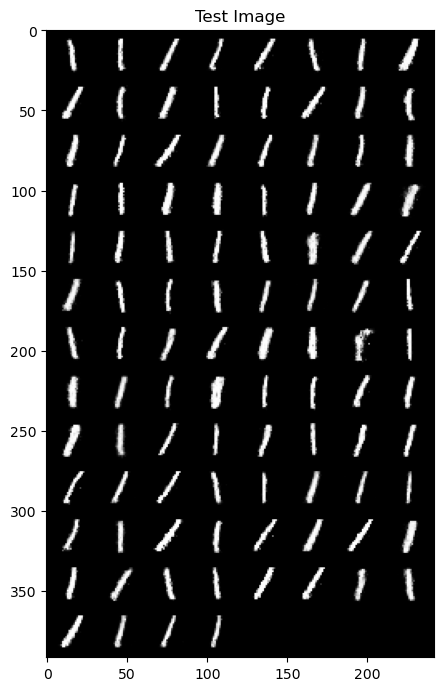

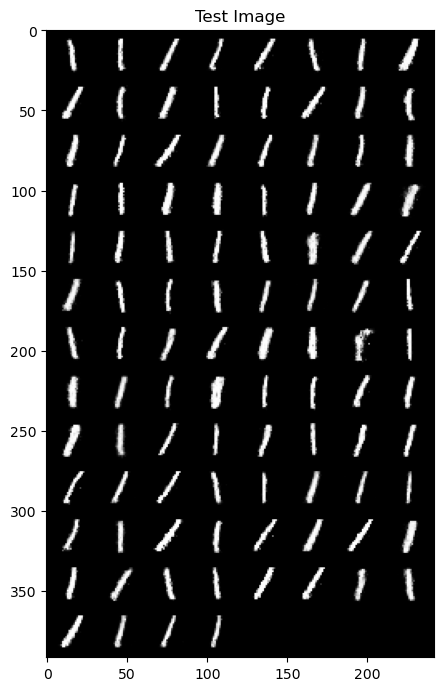

In [13]:
G.eval()

z = torch.randn((batch_size, 100)).cuda()
images = G(z)
imshow(torchvision.utils.make_grid(images.data.cpu(), normalize=True), "Test Image")